<img src="Affinity-Propagation.png" width="350" height="300" align="right"/>

# Affinity Propagation 
 
  
Author: Christoph Güttner  

**Abstract**  
A spherical set of 100 normally distributed datapoints is clustered by  
the affinity propagation algorithm (unsupervised learning). 20 values  
for the hyperparameter *preference* are plotted and evaluated by the  
silhouette metric.  
  
The affinity propagation algorithm is based on the euclidian distance  
metric (similarity), and two further indicators (availability and  
repsonsibility) to determine the number of clusters. Each cluster has an  
exemplar (a representative datapoint). The main idea is that exemplars are  
chosen by samples if they are i) similar enough to many samples and ii)  
chosen by many samples to be representative of themselves. A hyperparameter  
called preference (with a minus sign) increases the threshold for potential  
exemplars and decreases therefore the the number of resulting clusters. Hence,  
the affinity propagation algorithm does not require the number of clusters  
to be determined or estimated before running the algorithm.  
The time complexity of the order $O(N^2 T)$, where N is the number of  
samples and T is the number of iterations until convergence. In other  
words, every datapoint exchanges information with every other.


In [ ]:
## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [Theory](#Theory)
    * [Similarity](#Similarity)
    * [Responsibility](#Responsibility)
    * [Availability](#Availability)
* [Data](#Data)
    * [Sphered Normal Distribution](#Sphered Normal Distribution)
* [Clustering Dynamics](#Clustering_Dynamics)
    * [Preference Dependency](#Preference_Dependency)
* [Evaluation](#Evaluation)

In [147]:
import numpy as np
import pandas as pd
from scipy.special import gammainc
from itertools import cycle
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()
from sklearn import metrics
from sklearn.cluster import AffinityPropagation


In [172]:

def sample_normal(center,radius,n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(0,1.5,size=(n_per_sphere, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

def get_datapoints(func, n_samples):
    plt.figure( figsize=(7,7))
    center = np.array([0,0])
    radius = 1.2
    p = func(center,radius,n_samples)
    plt.scatter(p[:,0],p[:,1],s=12, color='#00225D')
    plt.title('DataPoints', fontdict = {'fontsize' : 20})
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.gca().set_aspect('equal')

def get_affinity_propagation(data, pref):
    colors = cycle('grcmyb')
    Evaluation = []
    fig,axes = plt.subplots(4,5, figsize=(20,20))
    fig.suptitle('Clustering Dynamics', size = '30')
    for i,ax in enumerate(axes.flatten()):
        clustering = AffinityPropagation(preference=pref[i], random_state=5).fit(data)
        cluster_centers_indices = clustering.cluster_centers_indices_
        labels = clustering.labels_
        n_clusters_ = len(cluster_centers_indices)
        evalu= metrics.silhouette_score(data, labels, metric='euclidean')
        Evaluation.append(evalu)
        for k, col in zip(range(n_clusters_), colors):
            class_members = labels == k
            cluster_center = data[cluster_centers_indices[k]]
            ax.plot(data[class_members, 0], data[class_members, 1], col+ '.' )
            ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                    markeredgecolor='k', markersize=4)
            ax.set_title('p={}'.format(pref[i]))
            for x in data[class_members]:
                ax.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        ax.set_aspect('equal', adjustable='box')
    return Evaluation

def plot_evaluation(silhouette):
    dict = {'Silhouette Score':silhouette}
    df = pd.DataFrame(dict, index=pref)
    df.plot.bar(figsize=(15,5), color='#162B3D')
    plt.title('Silhouette Score', size='20')
    plt.show()



## Theory  
  
To determine the number of clusters and the respective exemplar  
(calculated datapoint), serveral indicators have to specified. 

**Similarity**   
similiarty measurment is represented by the Euclidian distance  
(with a minus sign).  
   
$$s(i, k) = - \lvert\lvert x_i - x_k \rvert\rvert^2 $$ 

**Responsibility**  
The ‘responsibility’ matrix R reflects how  
well-suited point k is to be an exemplar for point i  
  
$$r(i, k) \leftarrow s(i, k) - \max\limits_{k' s.t. k' \neq k}\{ a(i, k') + s(i, k') \} $$

**Availability**  
The ‘availability’ matrix A reflects how appropriate it would   
be for point i to choose point k as its exemplar.  
  
$$a(k, k) \leftarrow \sum\limits_{i' \neq k}\max(0, r(i', k))$$  
  
$$a(i, k) \leftarrow \min\{0, r(k,k) + \sum\limits_{i' s.t. i' \notin \{i, k\}}{\max\{0, r(i', k)\}}$$
  
Since s(i,k) represents the similarity level between nodes i and k,  
both responsibility r(i,k) and availability a(i,k) indicate how well-suited  
node k is to serve as clusterhead for node i from the perspective of nodes  
i and k, respectively.  
  
**Exemplar** 
$$r(i,i)+a(i,i) + pp >0$$  
  
where pp is a *prior preference* with a minus sign. Among the potential exemplars,  
nodes with the highest node degree level among its single-hop neighborhood  
become the exemplar.


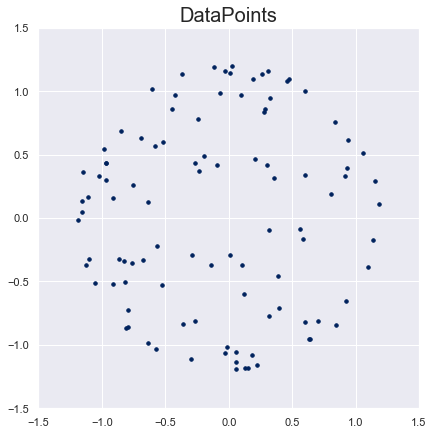

In [175]:
np.random.seed(42)
get_datapoints(sample_normal, 100)

## Affinity_Propagation  

Here, 20 different values for the hyperparameter *preference* are taken,  
and the resulting clusters are shown.

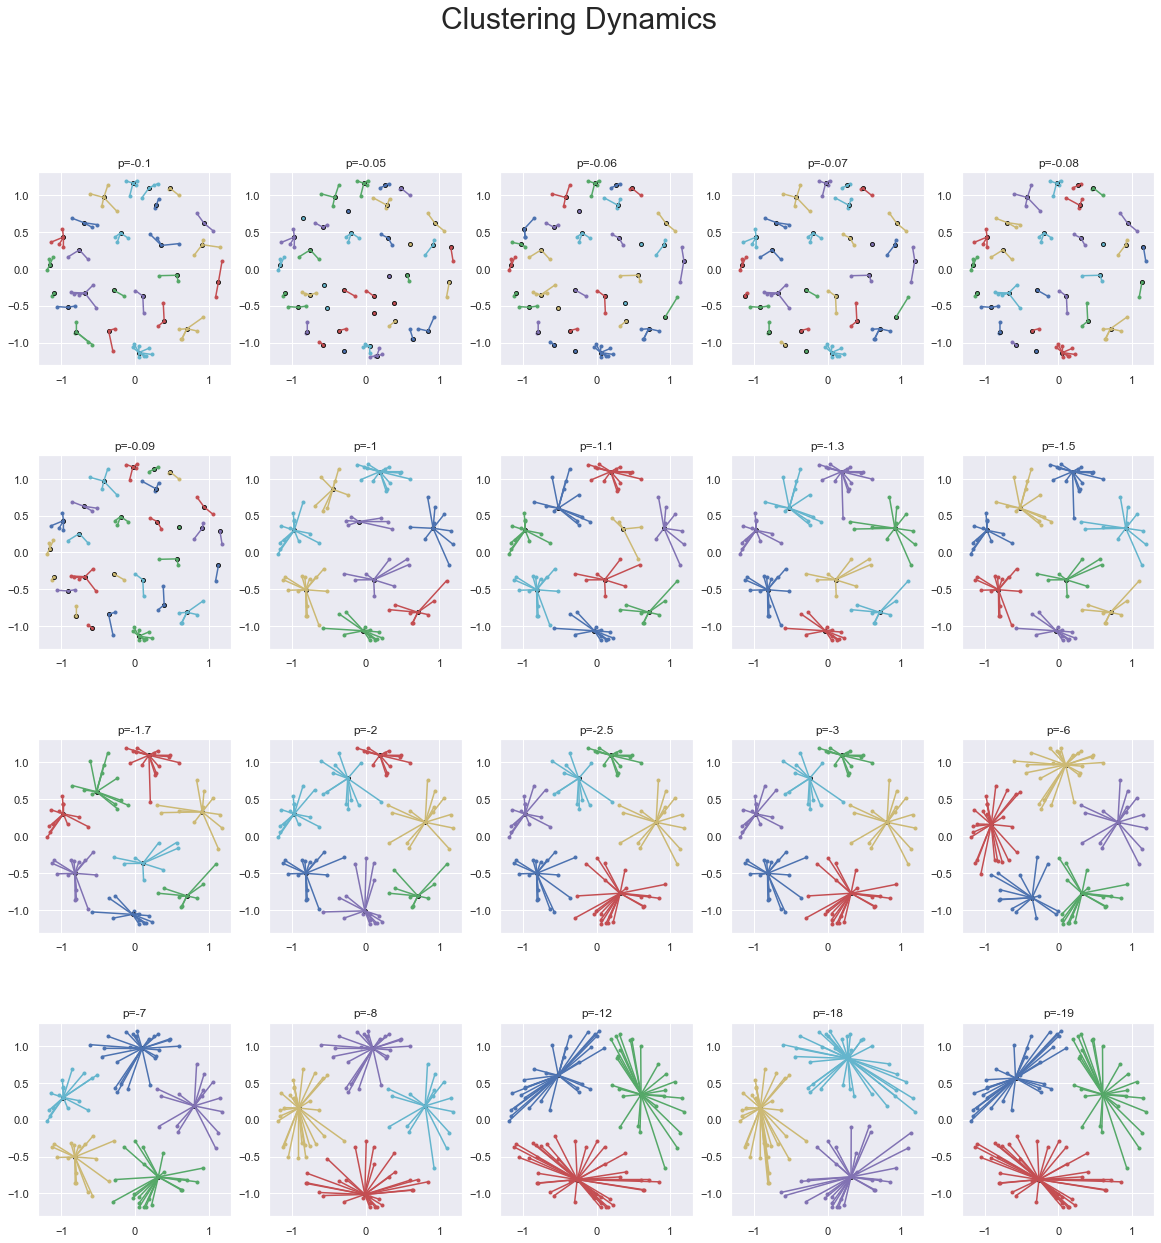

In [173]:
pref= [-0.1, -0.05, -0.06,-0.07,-0.08,-0.09,-1,-1.1,-1.3, -1.5,-1.7,-2,-2.5,-3,-6,-7,-8,-12,-18,-19]
silhouette = get_affinity_propagation(p, pref)

## Evaluation

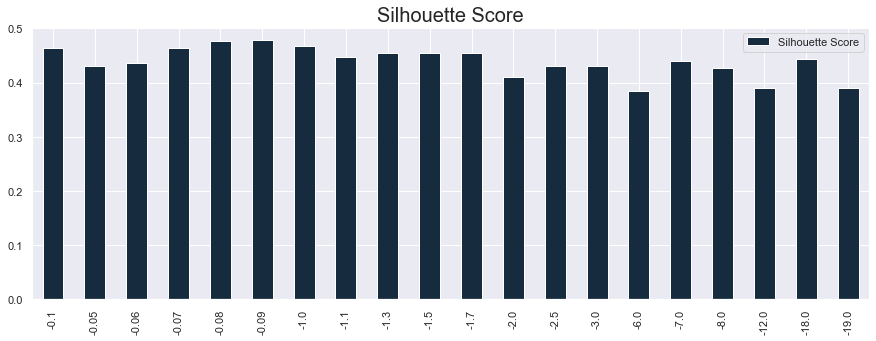

In [176]:


plot_evaluation(silhouette)